<a href="https://colab.research.google.com/github/opmaksim/Colab_opencv/blob/main/0829_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


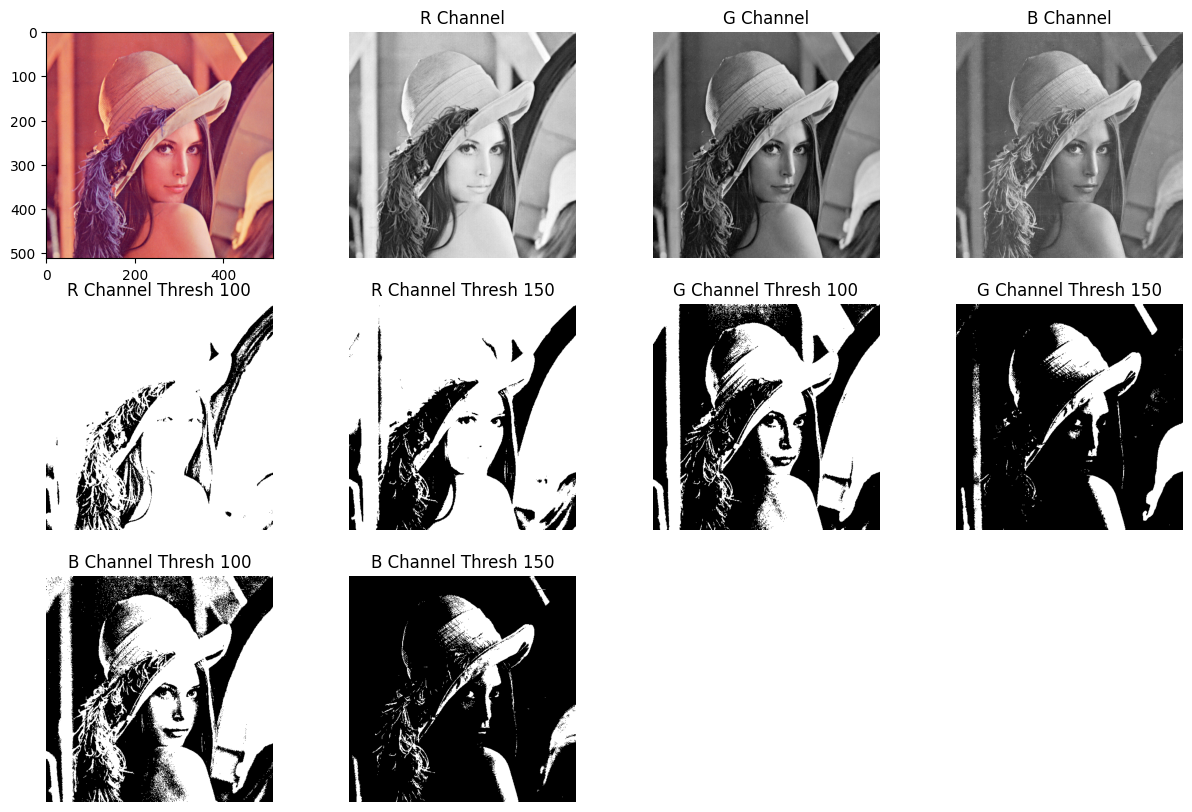

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive/')
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

RGB_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R_img1, G_img1, B_img1 = cv2.split(RGB_img1)
rows, cols = RGB_img1.shape[0], R_img1.shape[1]

threshold1 = 100
threshold2 = 150

R_thresh1, R_thresh2, G_thresh1, G_thresh2, B_thresh1, B_thresh2= [np.zeros((rows, cols), dtype=np.uint8) for _ in range(6)]

def make_threshold(color_img, threshold, thresh):
  for i in range(rows):
    for j in range(cols):
      if color_img[i,j] > threshold:
        thresh[i,j] = 255;
      else:
        thresh[i,j] = 0;

channels = [R_img1, G_img1, B_img1]
thresholds = [threshold1, threshold2]
output_images = [R_thresh1, R_thresh2, G_thresh1, G_thresh2, B_thresh1, B_thresh2]

index = 0
for channel in channels:
    for threshold in thresholds:
        make_threshold(channel, threshold, output_images[index])
        index += 1

# 결과 영상 출력
plt.figure(figsize=(15,10))

# 원본 채널 영상
plt.subplot(3, 4, 1), plt.imshow(RGB_img1)
plt.subplot(3, 4, 2), plt.imshow(R_img1, cmap='gray')
plt.title('R Channel'), plt.axis('off')
plt.subplot(3, 4, 3), plt.imshow(G_img1, cmap='gray')
plt.title('G Channel'), plt.axis('off')
plt.subplot(3, 4, 4), plt.imshow(B_img1, cmap='gray')
plt.title('B Channel'), plt.axis('off')

# R 채널 임계값 적용 영상
plt.subplot(3, 4, 5), plt.imshow(R_thresh1, cmap='gray')
plt.title(f'R Channel Thresh {threshold1}'), plt.axis('off')
plt.subplot(3, 4, 6), plt.imshow(R_thresh2, cmap='gray')
plt.title(f'R Channel Thresh {threshold2}'), plt.axis('off')

# G 채널 임계값 적용 영상
plt.subplot(3, 4, 7), plt.imshow(G_thresh1, cmap='gray')
plt.title(f'G Channel Thresh {threshold1}'), plt.axis('off')
plt.subplot(3, 4, 8), plt.imshow(G_thresh2, cmap='gray')
plt.title(f'G Channel Thresh {threshold2}'), plt.axis('off')

# B 채널 임계값 적용 영상
plt.subplot(3, 4, 9), plt.imshow(B_thresh1, cmap='gray')
plt.title(f'B Channel Thresh {threshold1}'), plt.axis('off')
plt.subplot(3, 4, 10), plt.imshow(B_thresh2, cmap='gray')
plt.title(f'B Channel Thresh {threshold2}'), plt.axis('off')

plt.show()
